In [45]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debeshkumar04","key":"805faf0ad81376aeebe7900e3184b77b"}'}

In [46]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [47]:
!pip install -q kaggle

In [48]:
!kaggle datasets download -d datasnaek/mbti-type

Dataset URL: https://www.kaggle.com/datasets/datasnaek/mbti-type
License(s): CC0-1.0
mbti-type.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!unzip mbti-type.zip -d ./data

Archive:  mbti-type.zip
replace ./data/mbti_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./data/mbti_1.csv       


In [50]:
import pandas as pd

df = pd.read_csv('data/mbti_1.csv')
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [51]:
# Check shape of the dataset
print("Shape of dataset:", df.shape)

# List column names
print("Columns:", df.columns.tolist())

# View data types
print("\nData types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (8675, 2)
Columns: ['type', 'posts']

Data types:
 type     object
posts    object
dtype: object

Missing values:
 type     0
posts    0
dtype: int64


type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


/tmp/ipython-input-52-1217110611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")


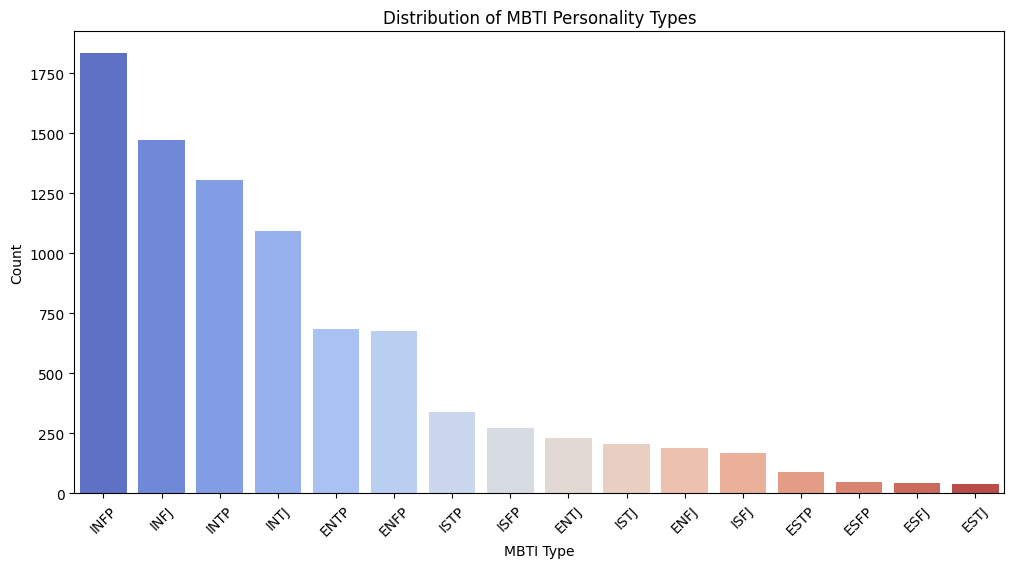

In [52]:
# Frequency count of each MBTI type
type_counts = df['type'].value_counts()
print(type_counts)

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")
plt.title("Distribution of MBTI Personality Types")
plt.xlabel("MBTI Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [53]:
# View a sample post
print(df['posts'][0])

# Count average number of words per post group
df['post_length'] = df['posts'].apply(lambda x: len(x.split()))
print("Average words per user:", df['post_length'].mean())

# Optional: Split into individual posts (separated by '|||')
df['individual_posts'] = df['posts'].apply(lambda x: x.split('|||'))
print("Sample split posts for one user:")
print(df['individual_posts'][0][:3])  # Show first 3 posts


'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

In [67]:
df['IE'] = df['type'].apply(lambda x: 1 if x[0] == 'I' else 0)
df['NS'] = df['type'].apply(lambda x: 1 if x[1] == 'N' else 0)
df['TF'] = df['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
df['JP'] = df['type'].apply(lambda x: 1 if x[3] == 'J' else 0)

# Extract JP trait and create 'label' column
df['label'] = df['JP'].map({1: 0, 0: 1}) # Map J=1 to 0 and P=0 to 1 for binary classification

print(df[['type', 'IE', 'NS', 'TF', 'JP', 'label']])

KeyError: 'type'

In [55]:
# Count the occurrences of 'T' (1) and 'F' (0) in the 'TF' column
tf_counts = df['TF'].value_counts()

# Rename the index for clarity
tf_counts.index = ['T' if x == 1 else 'F' for x in tf_counts.index]

print("Counts for 'T' and 'F' traits:")
display(tf_counts)

Counts for 'T' and 'F' traits:


,count
F,4694
T,3981


In [56]:
ie_counts = df['IE'].value_counts()

ie_counts.index = ['I' if x == 1 else 'E' for x in ie_counts.index]

print("Counts for 'I' and 'E' traits:")
display(ie_counts)

Counts for 'I' and 'E' traits:


,count
I,6676
E,1999


In [57]:
ns_counts = df['NS'].value_counts()

ns_counts.index = ['N' if x == 1 else 'S' for x in ns_counts.index]

print("Counts for 'N' and 'S' traits:")
display(ns_counts)

Counts for 'N' and 'S' traits:


,count
N,7478
S,1197


In [58]:
jp_counts = df['JP'].value_counts()

# Rename the index for clarity
jp_counts.index = ['J' if x == 1 else 'P' for x in jp_counts.index]

print("Counts for 'J' and 'P' traits:")
display(jp_counts)

Counts for 'J' and 'P' traits:


,count
P,5241
J,3434


In [59]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-07-14 03:20:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-14 03:20:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-14 03:20:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [60]:
df.columns

Index(['type', 'posts', 'post_length', 'individual_posts', 'IE', 'NS', 'TF',
       'JP'],
      dtype='object')

In [61]:
'''import pandas as pd

# Extract JP trait (4th letter in MBTI type)
df['JP'] = df['label'].apply(lambda x: x[3])

# Binary label: J = 0, P = 1
df['label'] = df['JP'].map({'J': 0, 'P': 1})

# Drop unused columns
#df = df.drop(columns=['type', 'JP'])'''

"import pandas as pd\n\n# Extract JP trait (4th letter in MBTI type)\ndf['JP'] = df['label'].apply(lambda x: x[3])\n\n# Binary label: J = 0, P = 1\ndf['label'] = df['JP'].map({'J': 0, 'P': 1})\n\n# Drop unused columns\n#df = df.drop(columns=['type', 'JP'])"

In [62]:
import numpy as np

glove_path = "glove.6B.100d.txt"
embedding_index = {}

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print(f"Loaded {len(embedding_index):,} word vectors.")

Loaded 400,000 word vectors.


In [63]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, MaxPooling1D, BatchNormalization,
    Bidirectional, LSTM, Dense, Dropout
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [68]:
# df = df.drop(columns=['type'])

In [73]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, MaxPooling1D, BatchNormalization,
    Bidirectional, LSTM, Dense, Dropout
)
from tensorflow.keras.regularizers import l2


MAX_NUM_WORDS = 160000
MAX_SEQUENCE_LEN = 200
EMBEDDING_DIM = 100

# Load the dataframe
df = pd.read_csv('data/mbti_1.csv')

# Extract JP trait and create 'label' column before dropping 'type'
df['JP'] = df['type'].apply(lambda x: x[3])
df['label'] = df['JP'].map({'J': 0, 'P': 1})

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['posts'])

sequences = tokenizer.texts_to_sequences(df['posts'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LEN, padding='post', truncating='post')
y = df['label'].values

# ============================== #
#     LOAD GloVe EMBEDDINGS
# ============================== #
glove_path = "glove.6B.100d.txt"
embedding_index = {}

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print(f"Loaded {len(embedding_index):,} word vectors.")

# ============================== #
#         MODEL ARCHITECTURE
# ============================== #
# Define num_words based on tokenizer
num_words = min(MAX_NUM_WORDS, len(tokenizer.word_index) + 1)

# Create embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
# Assuming embedding_index is already loaded in a previous cell
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LEN,
        trainable=True  # fine-tune GloVe
    ),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=5),
    BatchNormalization(),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Add the compile step here
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Loaded 400,000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# ============================== #
#     LOAD GloVe EMBEDDINGS
# ============================== #
embedding_index = {}
with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
num_words = min(MAX_NUM_WORDS, len(tokenizer.word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# ============================== #
#     TRAIN / VALIDATION SPLIT
# ============================== #
X, y = shuffle(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ============================== #
#         MODEL ARCHITECTURE
# ============================== #
model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LEN,
        trainable=True  # fine-tune GloVe
    ),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=5),
    BatchNormalization(),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

model.summary()

# ============================== #
#         TRAINING
# ============================== #
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks
)

# ============================== #
#     PREDICTIONS & INSPECTION
# ============================== #
pred_probs = model.predict(X_val)
print("\nSample predicted probabilities:")
print(np.round(pred_probs[:10].flatten(), 3))

print("\nRounded class distribution:")
print(np.unique(np.round(pred_probs), return_counts=True))

In [74]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.optimizers import Adam

# Define MAX_SEQUENCE_LEN in this cell
MAX_SEQUENCE_LEN = 200

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2)
]

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks
)
pred_probs = model.predict(X_val)
print(np.round(pred_probs[:10].flatten(), 3))  # see skew
print(np.unique(np.round(pred_probs), return_counts=True))  # shows class prediction bias

Epoch 1/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 68s 255ms/step - accuracy: 0.5114 - loss: 0.7570 - val_accuracy: 0.4052 - val_loss: 0.7535 - learning_rate: 0.0010
Epoch 2/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 77s 234ms/step - accuracy: 0.5435 - loss: 0.7203 - val_accuracy: 0.5775 - val_loss: 0.7061 - learning_rate: 0.0010
Epoch 3/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.6060 - loss: 0.6843 - val_accuracy: 0.5885 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 4/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 56s 258ms/step - accuracy: 0.6895 - loss: 0.6218 - val_accuracy: 0.5988 - val_loss: 0.7096 - learning_rate: 0.0010
Epoch 5/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 54s 250ms/step - accuracy: 0.8048 - loss: 0.4700 - val_accuracy: 0.5504 - val_loss: 0.8165 - learning_rate: 0.0010
Epoch 6/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 54s 248ms/step - accuracy: 0.9382 - loss: 0.2491 - val_accuracy: 0.5683 - val_loss: 0.9009 - learning_rate: 1.0000e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
[0.659 0.535 0.48  0.59  0

In [75]:
from sklearn.metrics import classification_report
pred_labels = (pred_probs > 0.5).astype(int)
print(classification_report(y_val, pred_labels))

              precision    recall  f1-score   support

           0       0.42      0.11      0.17       687
           1       0.61      0.90      0.73      1048

    accuracy                           0.59      1735
   macro avg       0.51      0.51      0.45      1735
weighted avg       0.53      0.59      0.51      1735

